# Clipping data

In [2]:
# import necessary packages and libraries 
import geopandas as gpd 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as pd 
import xarray as xr
import os 
from datetime import datetime
import folium


In [3]:
nepal_shp= gpd.read_file("data/Local Unit/local_unit.shp")

<Axes: >

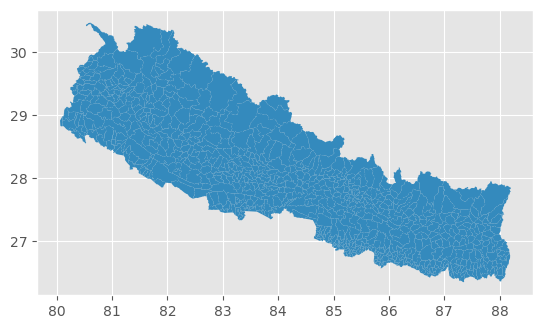

In [4]:
plt.style.use('ggplot')
nepal_shp.plot()

In [6]:
coords=nepal_shp.get_coordinates()

In [7]:
coords

,x,y
0,87.609846,27.370434
0,87.611066,27.369431
0,87.612519,27.369734
0,87.613032,27.369581
0,87.614150,27.368976
...,...,...
776,82.872963,28.832512
776,82.873160,28.832387
776,82.873331,28.832298
776,82.873400,28.832224


In [8]:
lon_min = min(coords['x'])
lon_max = max(coords['x'])
lat_min = min(coords['y'])
lat_max = max(coords['y'])

In [9]:

grace_data = xr.open_dataset("data/CSR.nc")

In [10]:
grace_data

<xarray.Dataset> Size: 941MB
Dimensions:        (time: 227, timebound: 2, lon: 1440, lat: 720)
Coordinates:
  * time           (time) float32 908B 107.0 129.5 227.5 ... 7.958e+03 7.989e+03
  * lon            (lon) float32 6kB 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * lat            (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 2kB ...
    lwe_thickness  (time, lat, lon) float32 941MB ...
Attributes: (12/59)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL0602M
    subtitle:                   RL06.2 GRACE/GRACE-FO Total water storage wit...
    ...                         ...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    user_note_4:                This GRACE-FO RL06.2 data is an updated versi...
    date_created:               2024-02-03T21:30:28Z
    variable:                   liquid water equivalent thickness
    label:                      RL0602rc24cE
    Mask:                       Global

In [11]:
grace_data.dims

FrozenMappingWarningOnValuesAccess({'time': 227, 'timebound': 2, 'lon': 1440, 'lat': 720})

In [12]:
grace_df=grace_data[['lon','lat','time','lwe_thickness']].to_dataframe()

In [13]:
grace_df

lwe_thickness
lon     lat     time                 
0.125   -89.875 107.0       -2.712666
                129.5       -1.961382
                227.5       -3.233458
                258.0       -3.228227
                288.5       -1.814785
...                               ...
359.875  89.875 7866.5       4.312683
                7897.5       2.189520
                7928.0       3.763795
                7958.5       9.154743
                7989.0       7.549811

[235353600 rows x 1 columns]

In [14]:
grace_df.reset_index(inplace=True)
grace_df.reset_index(drop=True)

,lon,lat,time,lwe_thickness
0,0.125,-89.875,107.0,-2.712666
1,0.125,-89.875,129.5,-1.961382
2,0.125,-89.875,227.5,-3.233458
3,0.125,-89.875,258.0,-3.228227
4,0.125,-89.875,288.5,-1.814785
...,...,...,...,...
235353595,359.875,89.875,7866.5,4.312683
235353596,359.875,89.875,7897.5,2.189520
235353597,359.875,89.875,7928.0,3.763795
235353598,359.875,89.875,7958.5,9.154743


In [15]:
grace_df = grace_df[(grace_df.lon> lon_min) & (grace_df.lon < lon_max)]
grace_df = grace_df[(grace_df.lat> lat_min) & (grace_df.lat < lat_max)]
grace_df = grace_df.drop_duplicates()

In [16]:
grace_df.head()

,lon,lat,time,lwe_thickness
52406355,80.125,26.375,107.0,-3.164003
52406356,80.125,26.375,129.5,-6.246057
52406357,80.125,26.375,227.5,13.167450
52406358,80.125,26.375,258.0,18.264620
52406359,80.125,26.375,288.5,13.536168


In [17]:
grace_df.tail()

,lon,lat,time,lwe_thickness
57640289,88.125,30.375,7866.5,-6.362596
57640290,88.125,30.375,7897.5,2.695899
57640291,88.125,30.375,7928.0,-1.184571
57640292,88.125,30.375,7958.5,-3.068756
57640293,88.125,30.375,7989.0,-0.447921


In [18]:
grace_df.lon.unique()

array([80.125, 80.375, 80.625, 80.875, 81.125, 81.375, 81.625, 81.875,
       82.125, 82.375, 82.625, 82.875, 83.125, 83.375, 83.625, 83.875,
       84.125, 84.375, 84.625, 84.875, 85.125, 85.375, 85.625, 85.875,
       86.125, 86.375, 86.625, 86.875, 87.125, 87.375, 87.625, 87.875,
       88.125], dtype=float32)

In [25]:
grace_df['lat'].value_counts()

lat
26.375    7491
26.625    7491
26.875    7491
27.125    7491
27.375    7491
27.625    7491
27.875    7491
28.125    7491
28.375    7491
28.625    7491
28.875    7491
29.125    7491
29.375    7491
29.625    7491
29.875    7491
30.125    7491
30.375    7491
Name: count, dtype: int64

In [32]:
grace_df[(grace_df['lon'] == 80.125) & (grace_df['lat'] == 26.375)].head(50)

,lon,lat,time,lwe_thickness
52406355,80.125,26.375,107.0,-3.164003
52406356,80.125,26.375,129.5,-6.246057
52406357,80.125,26.375,227.5,13.167450
52406358,80.125,26.375,258.0,18.264620
52406359,80.125,26.375,288.5,13.536168
52406360,80.125,26.375,319.0,8.427094
52406361,80.125,26.375,349.5,-2.432389
52406362,80.125,26.375,380.5,0.645797
52406363,80.125,26.375,410.0,0.074017
52406364,80.125,26.375,439.5,-2.126761


<Axes: xlabel='time'>

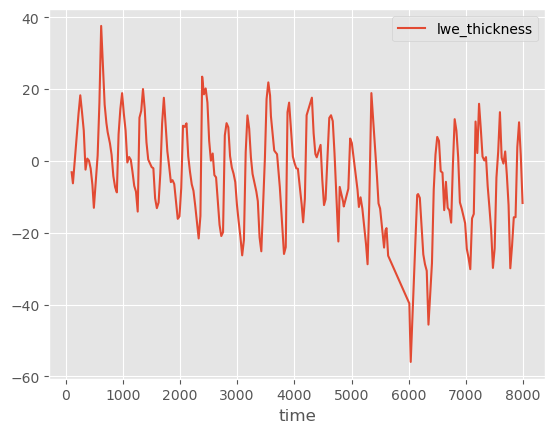

In [35]:
grace_df[(grace_df['lon'] == 80.125) & (grace_df['lat'] == 26.375)].plot(x = 'time', y = 'lwe_thickness')

In [46]:
time_to_plot = grace_df['time'].iloc[0]
df_time = grace_df[grace_df['time'] == time_to_plot]

plt.figure(figsize=(10, 5))
plt.scatter(df_time['long'], df_time['lat'], c=df_time['lwe_thickness'], cmap='viridis', s=100)
plt.colorbar(label='Thickness Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Thickness Value on {time_to_plot.date()}')
plt.show()

KeyError: 'long'

<Figure size 1000x500 with 0 Axes>

In [49]:
import numpy as np
import cartopy.crs as ccrs

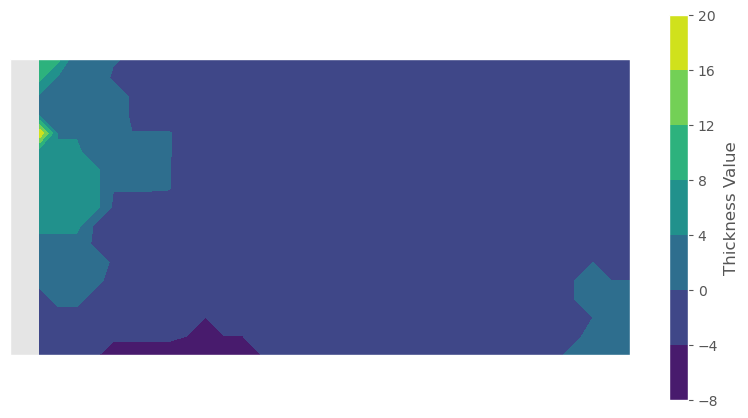

In [57]:
# Filter the data for a specific time (e.g., the first available time)
time_to_plot = grace_df['time'].iloc[0]
df_time = grace_df[grace_df['time'] == time_to_plot]

# Create a grid of the data
latitudes = df_time['lat'].unique()
longitudes = df_time['lon'].unique()
lat_grid, lon_grid = np.meshgrid(latitudes, longitudes)
lwe_thickness = np.empty(lat_grid.shape)

for i, lat in enumerate(latitudes):
    for j, lon in enumerate(longitudes):
        mask = (df_time['lat'] == lat) & (df_time['lon'] == lon)
        if mask.any():
            lwe_thickness[j, i] = df_time[mask]['lwe_thickness'].values[0]

# Plotting
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Plot the data
plt.contourf(lon_grid, lat_grid, lwe_thickness, cmap='viridis', transform=ccrs.PlateCarree())
plt.colorbar(label='Thickness Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.title(f'Thickness Value on {time_to_plot.date()}')
plt.show()

In [55]:
df_time[(df_time['lat'] == lat) & (df_time['lon'] == lon)]

,lon,lat,time,lwe_thickness
55184835,84.375,26.375,107.0,-3.791946
